# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.__version__

'2.0.3'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [33]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [26]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [28]:
print("Колличество строк:", df.shape[0])
print("Колличество колонок:", df.shape[1])


Колличество строк: 32561
Колличество колонок: 15


3) Какие типы данных у элементов этого датасета?

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

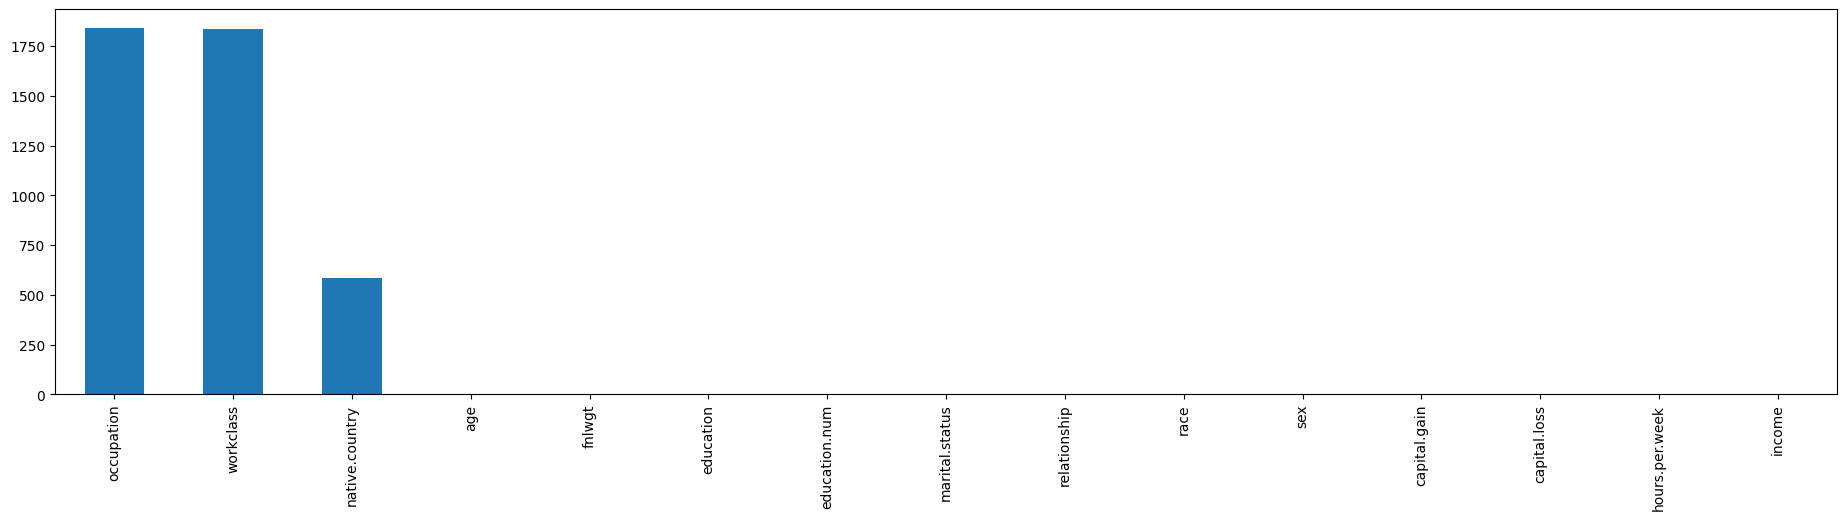

In [34]:
nulls = df.isnull().sum().sort_values(ascending=False)
plot_result = nulls.plot(kind='bar', figsize = (23,5))

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:

Пропуски значений могут быть связаны с отсуттвием необходимых данных данных

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [ ]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

7) Какой средний возраст женщин и мужчин?

In [15]:
df_grouped = df.groupby('sex')['age'].mean()
print(df_grouped)

sex
 Female    36.883459
 Male      39.184004
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

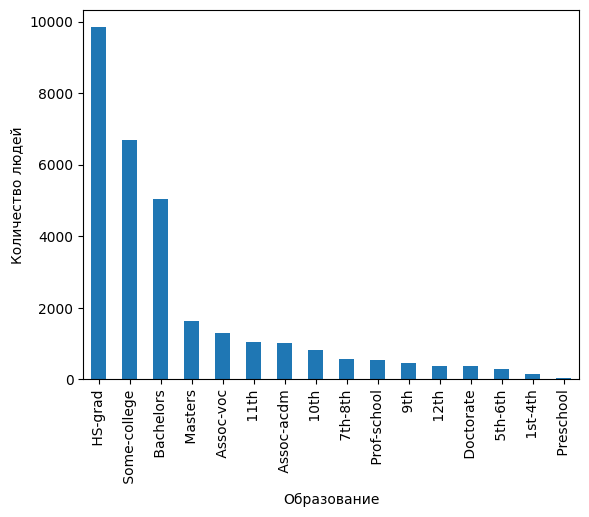

In [16]:
df['education'].value_counts().plot(kind='bar')

plt.xlabel('Образование')
plt.ylabel('Количество людей')

plt.show()

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [29]:
df = df.dropna()

print('Средний возраст тех, кто получает более 50K в год:', df[df['income'] == ' >50K']['age'].mean())
print('Среднеквадратичное отклонение возраста тех, кто получает более 50K в год:', df[df['income'] == ' >50K']['age'].std())
print('Средний возраст тех, кто получает менее 50K в год:', df[df['income'] == ' <=50K']['age'].mean())
print('Среднеквадратичное отклонение возраста тех, кто получает менее 50K в год:', df[df['income'] == ' <=50K']['age'].std())


Средний возраст тех, кто получает более 50K в год: 43.95911028236548
Среднеквадратичное отклонение возраста тех, кто получает более 50K в год: 10.269632835673852
Средний возраст тех, кто получает менее 50K в год: 36.60806038668668
Среднеквадратичное отклонение возраста тех, кто получает менее 50K в год: 13.464631257161633


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [30]:
income_more_50k_education = df[df['income'] == ' >50K']['education']
education_higher_set = ['Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

if income_more_50k_education.isin(education_higher_set).all():
    print('Все люди, которые получают больше 50k, имеют как минимум высшее образование')
else:
    print('Не все люди, которые получают больше 50k, имеют как минимум высшее образование')

Не все люди, которые получают больше 50k, имеют как минимум высшее образование


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [35]:
df_men = df[df['sex'] == ' Male']

married = df_men[df_men['marital.status'].str.startswith(' Married')]
single = df_men[~df_men['marital.status'].str.startswith(' Married')]

income_married = married['income'] == ' >50K'
income_single = single['income'] == ' >50K'

print(f"Доля зарабатывающих много среди женатых мужчин: {income_married.mean()}")
print(f"Доля зарабатывающих много среди холостых мужчин: {income_single.mean()}")

Доля зарабатывающих много среди женатых мужчин: 0.4405139945351156
Доля зарабатывающих много среди холостых мужчин: 0.08449509031397745


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



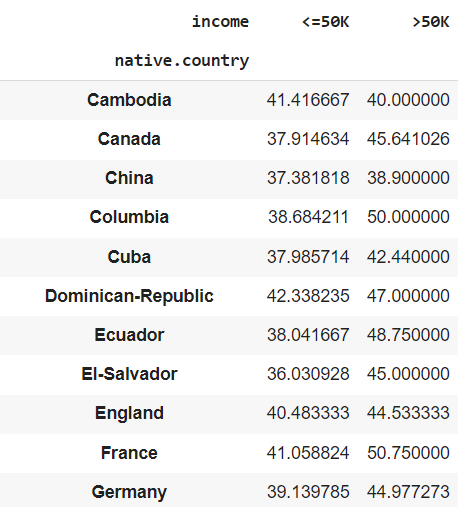

In [36]:
pivot_table = pd.pivot_table(df, values='hours.per.week', index='native.country', columns='income', aggfunc='mean')
pivot_table.columns = ['income (<=50K)','(>50K)']
pivot_table.head(10)

,income (<=50K),(>50K)
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

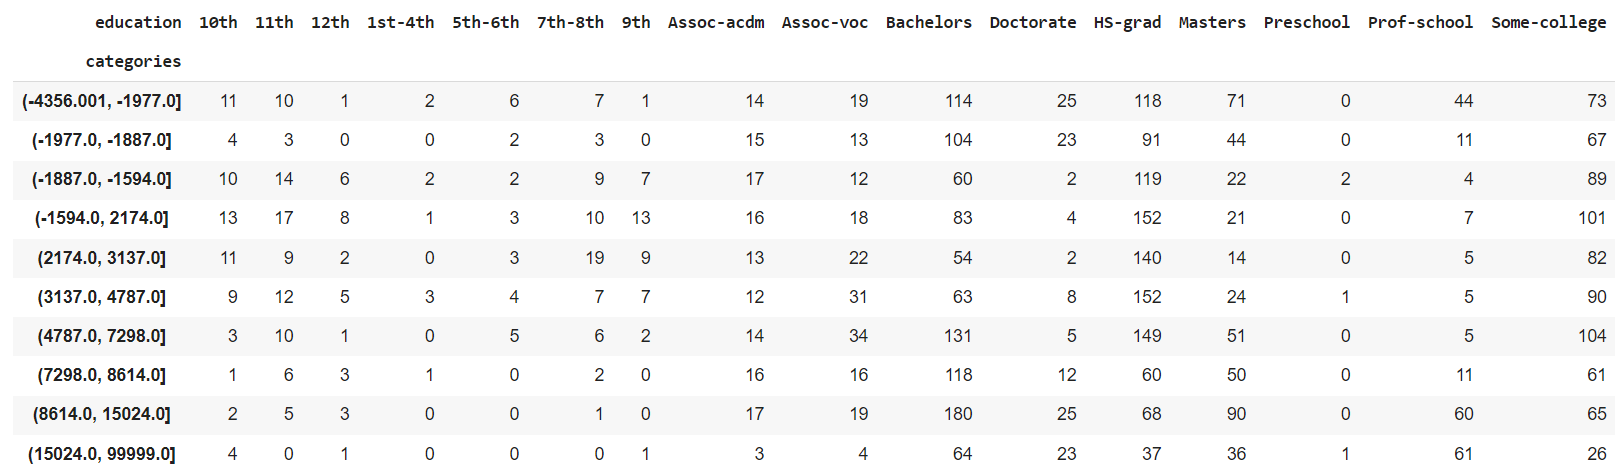

In [37]:
summary_table = df[['education', 'capital.gain', 'capital.loss']].copy()
summary_table['capital.diff'] = summary_table['capital.gain'] - summary_table['capital.loss']
summary_table = summary_table[summary_table['capital.diff'] != 0]
summary_table['categories'] = pd.qcut(summary_table['capital.diff'], q=10)
crosstab = pd.crosstab(summary_table['categories'], summary_table['education'])
crosstab.head(10)


education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
categories,,,,,,,,,,,,,,,,
"(-4356.001, -1977.0]",11,10,1,2,6,7,1,14,19,114,25,118,71,0,44,73
"(-1977.0, -1887.0]",4,3,0,0,2,3,0,15,13,104,23,91,44,0,11,67
"(-1887.0, -1594.0]",10,14,6,2,2,9,7,17,12,60,2,119,22,2,4,89
"(-1594.0, 2174.0]",13,17,8,1,3,10,13,16,18,83,4,152,21,0,7,101
"(2174.0, 3137.0]",11,9,2,0,3,19,9,13,22,54,2,140,14,0,5,82
"(3137.0, 4787.0]",9,12,5,3,4,7,7,12,31,63,8,152,24,1,5,90
"(4787.0, 7298.0]",3,10,1,0,5,6,2,14,34,131,5,149,51,0,5,104
"(7298.0, 8614.0]",1,6,3,1,0,2,0,16,16,118,12,60,50,0,11,61
"(8614.0, 15024.0]",2,5,3,0,0,1,0,17,19,180,25,68,90,0,60,65


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [ ]:
women_df = (df[df['sex'] == ' Female'].groupby('native.country')['income']
                                      .apply(lambda x: (x == ' >50K').mean())
                                      .sort_values(ascending=False))

women_df.head()

native.country
 Yugoslavia    0.333333
 France        0.300000
 Taiwan        0.300000
 Iran          0.285714
 China         0.277778
Name: income, dtype: float64

15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [ ]:
women_data = df[df['sex'] == ' Female']

women_income_by_country = women_data.groupby('native.country')['income'].apply(
    lambda x: (x == ' >50K').sum() / len(x))

women_income_by_country_sorted = women_income_by_country.sort_values(ascending=False)
women_income_by_country_sorted.head(100)

native.country
 Yugoslavia                    0.333333
 France                        0.300000
 Taiwan                        0.300000
 Iran                          0.285714
 China                         0.277778
 Japan                         0.277778
 Italy                         0.277778
 Canada                        0.264706
 Greece                        0.200000
 England                       0.200000
 Hong                          0.200000
 India                         0.181818
 Hungary                       0.166667
 Philippines                   0.166667
 Portugal                      0.166667
 Honduras                      0.166667
 Laos                          0.142857
 Ireland                       0.142857
 Germany                       0.129630
 South                         0.120000
 Poland                        0.117647
 United-States                 0.114644
 Thailand                      0.100000
 Nicaragua                     0.083333
 Cuba                    

## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [ ]:
columns='datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count'.split(',')
df = pd.read_csv('date/train.csv', na_values=' ?', names=columns)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13


In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

df = fetch_ucirepo(id=275).data.original
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

IndexError: index 3 is out of bounds for axis 0 with size 3

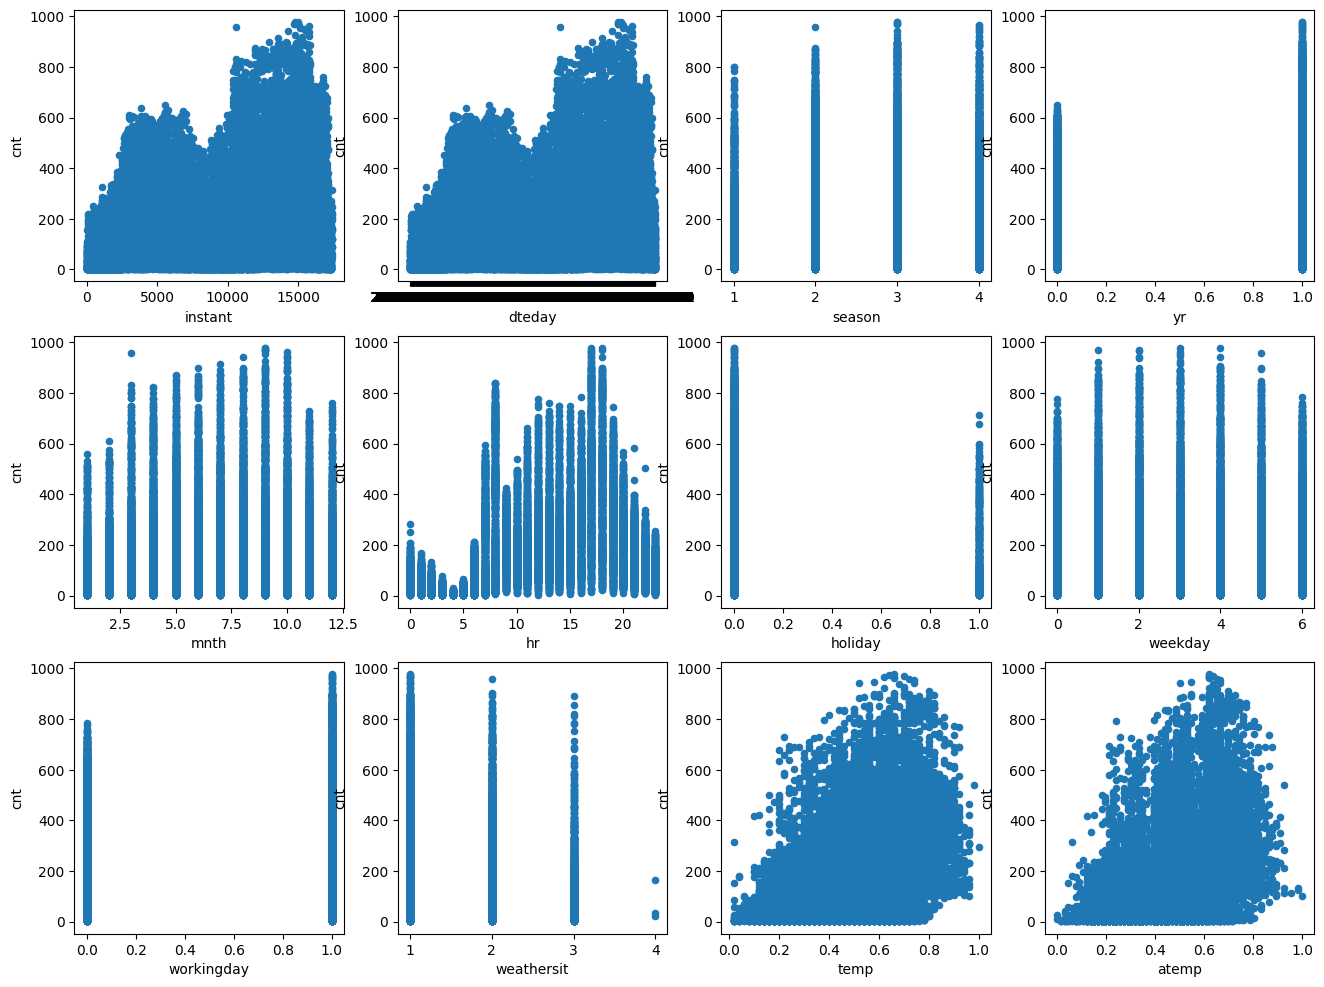

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

plt.tight_layout()

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: Прокат велосипедов в летнии месяцы используется чаще

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



Ответ: Прокат велосипедов зависит от температуры, чем она выше, тем выше колличество орендованных велосипедов

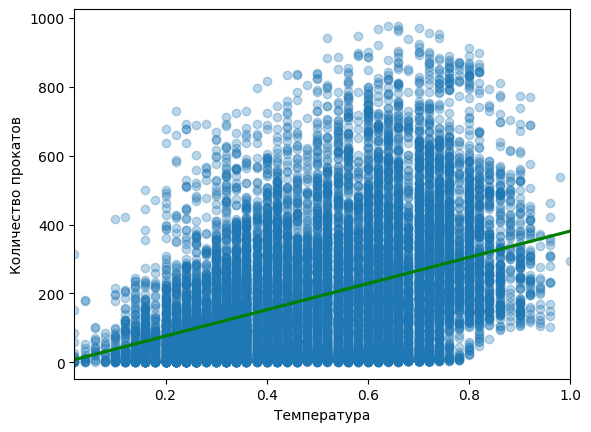

In [ ]:
sns.regplot(x="temp", y="cnt", data=df, scatter_kws={"alpha": 0.3}, ci=None, line_kws={'color': 'green'})
plt.xlabel("Температура")
plt.ylabel("Количество прокатов")
plt.show()

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



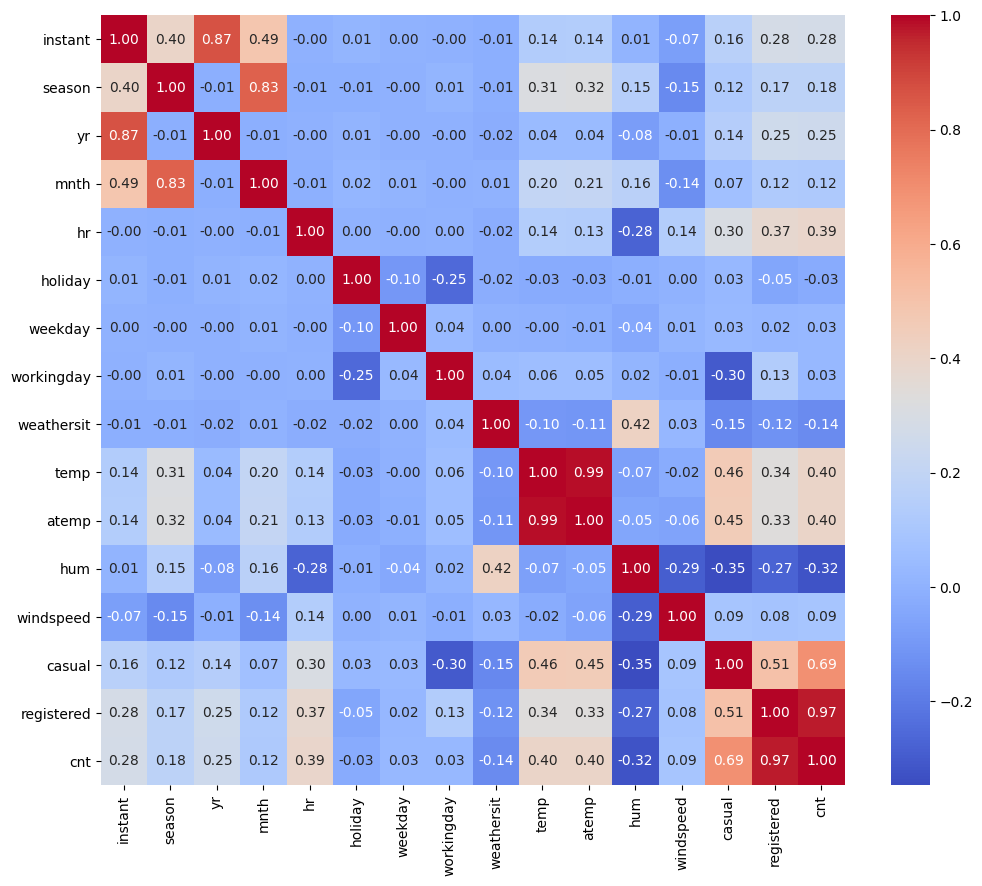

In [ ]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: Больше всего коррелируется с признаками, чье значение ближе к 1.0, а меньше всего с теми, чье значение ближе к -1.0

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



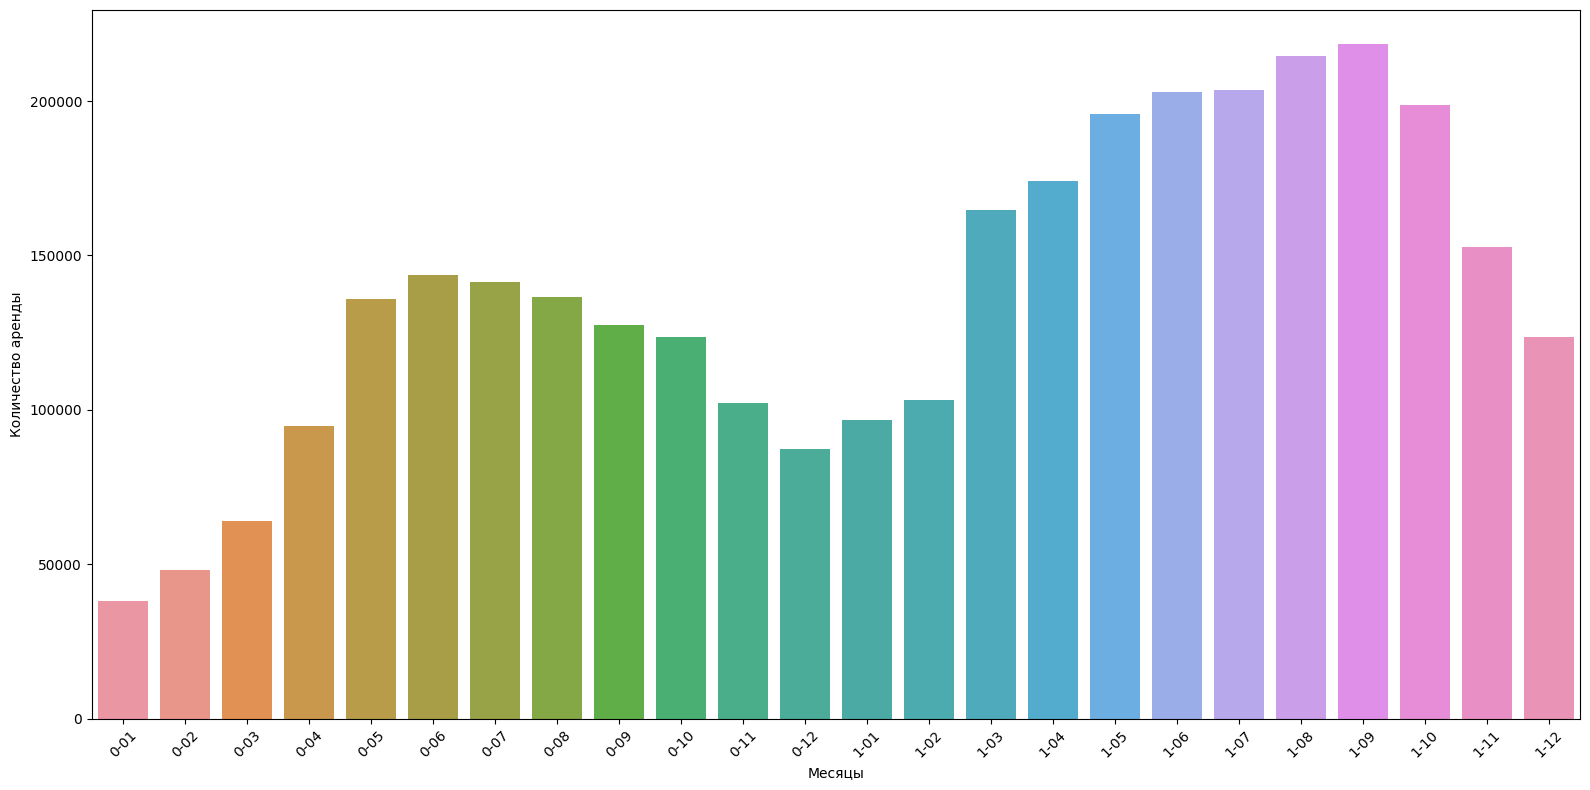

In [ ]:
grouped_data = df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()
grouped_data['year_month'] = grouped_data['yr'].astype(str) + '-' + grouped_data['mnth'].astype(str).str.zfill(2)


plt.figure(figsize=(16, 8))
sns.barplot(x='year_month', y='cnt', data=grouped_data)

plt.xlabel('Месяцы')
plt.ylabel('Количество аренды')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: Так как данные учитывались за 2 года, то колличество прокатов может быть свзано не только с годом

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



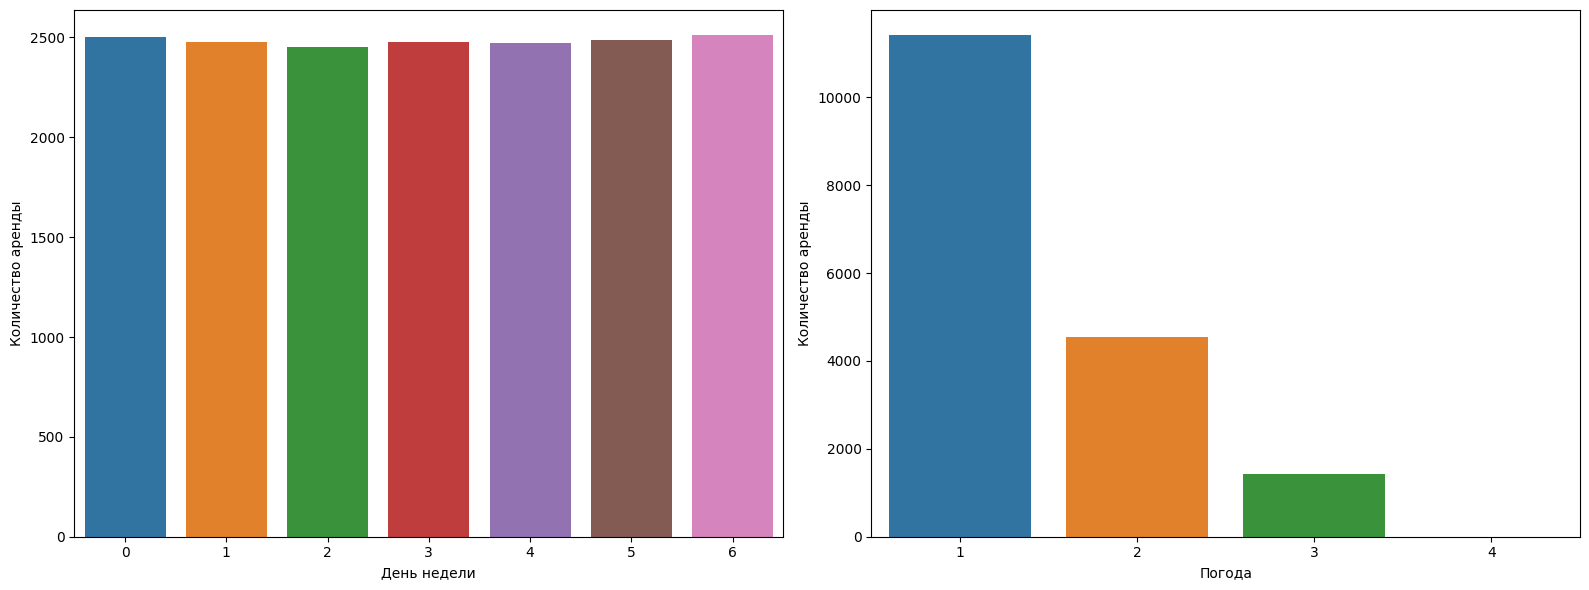

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.countplot(x='weekday', data=df, ax=axes[0])
axes[0].set(xlabel='День недели', ylabel='Количество аренды')

sns.countplot(x='weathersit', data=df, ax=axes[1])
axes[1].set(xlabel='Погода', ylabel='Количество аренды')

plt.tight_layout()
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: Прокат велосепипедов в хорошую погоду был популярнее, чем в плохую

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: равномерно

### 5. Распределение

Постройте распределение целевого признака.


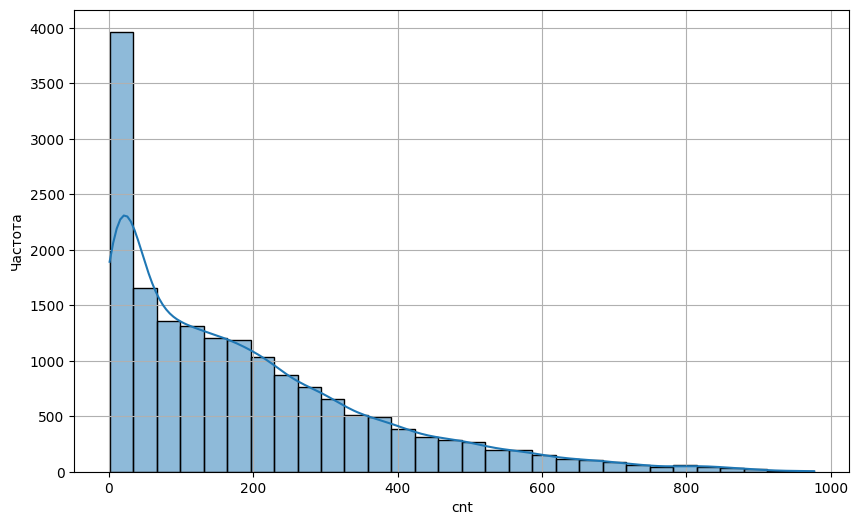

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='cnt', bins=30, edgecolor='black', alpha=0.5, kde=True, fill=True)
plt.xlabel('cnt')
plt.ylabel('Частота')
plt.grid(True)
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: +- 200

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



<Figure size 1000x800 with 0 Axes>

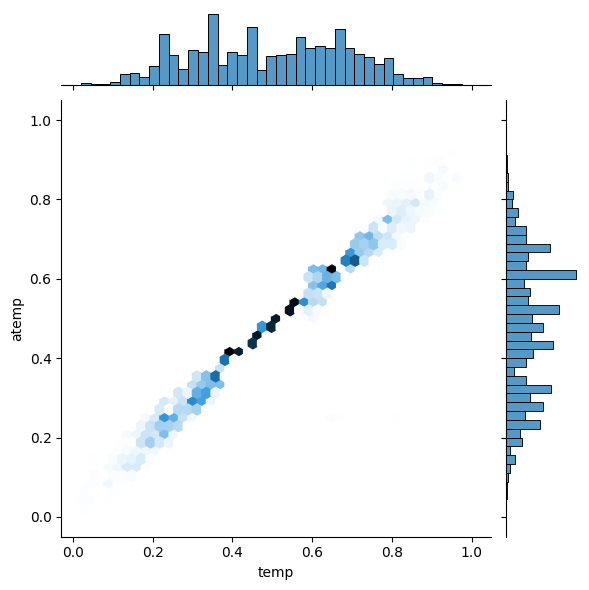

In [ ]:
fig = plt.figure(figsize=(10, 8))

sns.jointplot(data=df, x='temp', y='atemp', kind='hex')
plt.xlabel('Температура')
plt.ylabel('Ощущение температуры')
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Ощущаемая температура и реальная не должны сильно отличаться

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




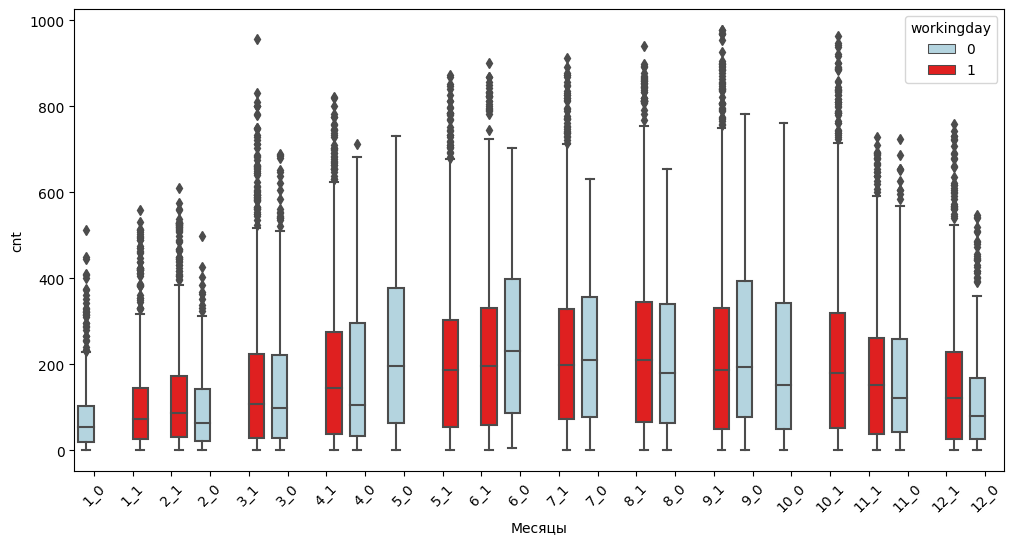

In [ ]:
df['month_workday'] = df['mnth'].astype(str) + '_' + df['workingday'].astype(str)

plt.figure(figsize=(12, 6))
sns.boxplot(x='month_workday', y='cnt', hue='workingday', data=df, palette=['lightblue', 'red'])

plt.xlabel('Месяцы')
plt.ylabel('cnt')
plt.xticks(rotation=45)
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: В холодный период велосипеды арендуют чаще в буднии, а в теплое время в выходные

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [ ]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
colab = False # если работаете на своём компьютере, в локальной среде, поставьте False
if colab:
    from google.colab import drive
    drive.mount('/content/drive')

В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [ ]:
if colab:
    df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
else:
    df = pd.read_csv("data/StudentsPerformance.csv")

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


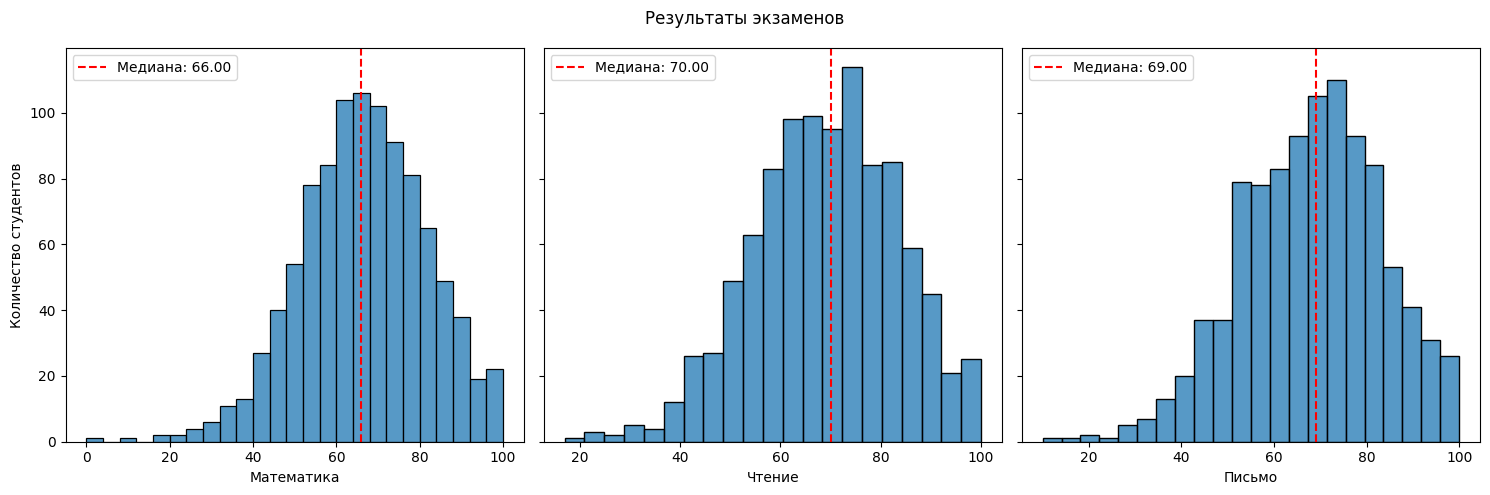

In [ ]:
median_exam1 = df['math score'].median()
median_exam2 = df['reading score'].median()
median_exam3 = df['writing score'].median()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Результаты экзаменов')

sns.histplot(data=df, x='math score', kde=False, ax=axes[0])
axes[0].set(xlabel='Математика', ylabel='Количество студентов')
axes[0].axvline(median_exam1, color='red', linestyle='--', label=f'Медиана: {median_exam1:.2f}')
axes[0].legend()

sns.histplot(data=df, x='reading score', kde=False, ax=axes[1])
axes[1].set(xlabel='Чтение', ylabel='')
axes[1].axvline(median_exam2, color='red', linestyle='--', label=f'Медиана: {median_exam2:.2f}')
axes[1].legend()

sns.histplot(data=df, x='writing score', kde=False, ax=axes[2])
axes[2].set(xlabel='Письмо', ylabel='')
axes[2].axvline(median_exam3, color='red', linestyle='--', label=f'Медиана: {median_exam3:.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


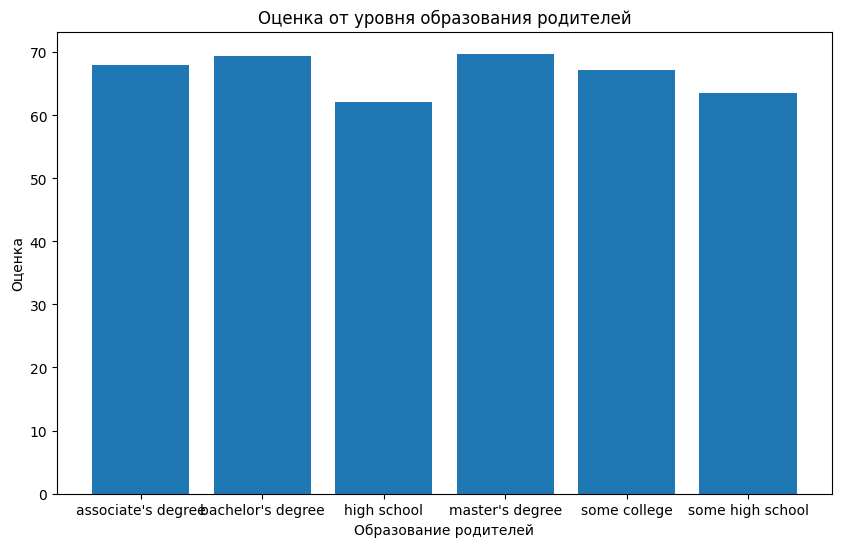

In [ ]:
math_scores_by_education = df.groupby('parental level of education')['math score'].mean()

plt.figure(figsize=(10, 6))
plt.bar(math_scores_by_education.index, math_scores_by_education.values)
plt.xlabel('Образование родителей')
plt.ylabel('Оценка')
plt.title('Оценка от уровня образования родителей')
plt.show()


Ответ: Оценка студентов, чьи родители окончили только среднюю школу, немного ниже чем у остальных

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [ ]:
filtered_df = df[(df['gender'] == 'female') &
                 (df['math score'] > 90) &
                 (df['reading score'] > 90) &
                 (df['writing score'] > 90)]
print('Число студенток, набравших больше 90 баллов по всем предметам:', len(filtered_df))

Число студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [ ]:
scores_by_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].agg(['min', 'max', 'median'])
scores_by_gender.columns = ['Math Min', 'Math Max', 'Math Median', 'Reading Min', 'Reading Max', 'Reading Median', 'Writing Min', 'Writing Max', 'Writing Median']
scores_by_gender

,Math Min,Math Max,Math Median,Reading Min,Reading Max,Reading Median,Writing Min,Writing Max,Writing Median
gender,,,,,,,,,
female,0,100,65.0,17,100,73.0,10,100,74.0
male,27,100,69.0,23,100,66.0,15,100,64.0


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [ ]:
scores_by_gender_lunch_prep = df.groupby(['gender', 'lunch', 'test preparation course'])[['math score', 'reading score', 'writing score']].agg('mean')
scores_by_gender_lunch_prep.columns = ['Math Mean', 'Reading Mean', 'Writing Mean']

scores_by_gender_lunch_prep

Math Mean  Reading Mean  \
gender lunch        test preparation course                            
female free/reduced completed                60.785714     73.428571   
                    none                     52.890756     63.831933   
       standard     completed                71.131579     79.798246   
                    none                     66.530233     73.386047   
male   free/reduced completed                65.639344     65.786885   
                    none                     60.609524     59.076190   
       standard     completed                75.955752     72.601770   
                    none                     69.832512     64.719212   

                                             Writing Mean  
gender lunch        test preparation course                
female free/reduced completed                   74.371429  
                    none                        61.781513  
       standard     completed                   81.508772  
                    none                        72.967442  
male   free/reduced completed                   65.737705  
                    none                        55.285714  
       standard     completed                   71.982301  
                    none                        61.906404

#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

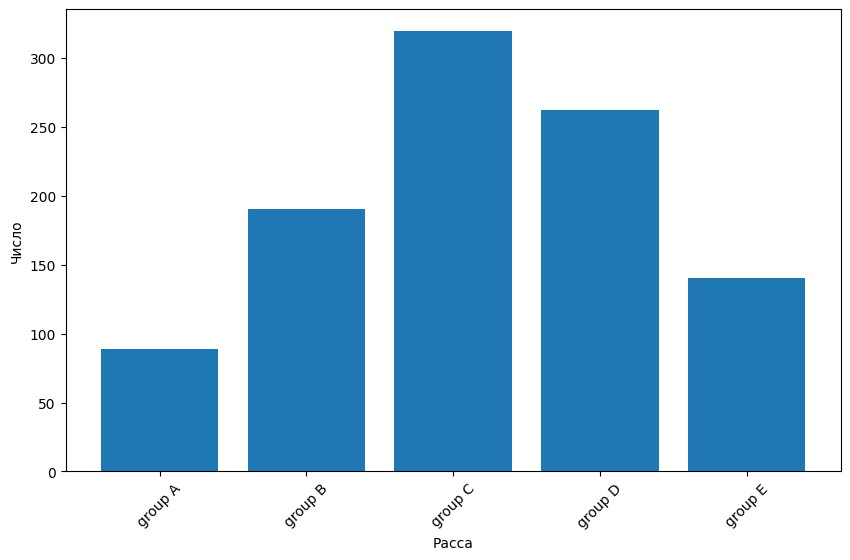

In [ ]:
education_by_race = df.groupby('race/ethnicity')['parental level of education'].value_counts().groupby(level=0).sum()

plt.figure(figsize=(10, 6))
plt.bar(education_by_race.index, education_by_race.values)
plt.xlabel('Расса')
plt.ylabel('Число')
plt.xticks(rotation=45)

plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

<Figure size 640x480 with 0 Axes>

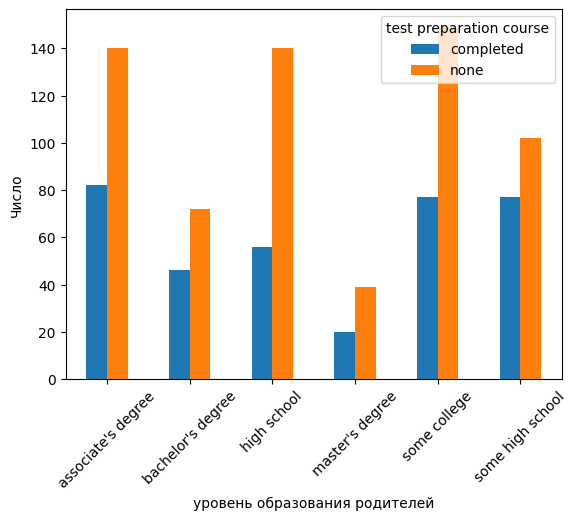

In [ ]:
test_prep_by_education = df.groupby('parental level of education')['test preparation course'].value_counts().unstack(fill_value=0)

plt.figure()
test_prep_by_education.plot(kind='bar')
plt.xlabel('уровень образования родителей')
plt.ylabel('Число')
plt.xticks(rotation=45)
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

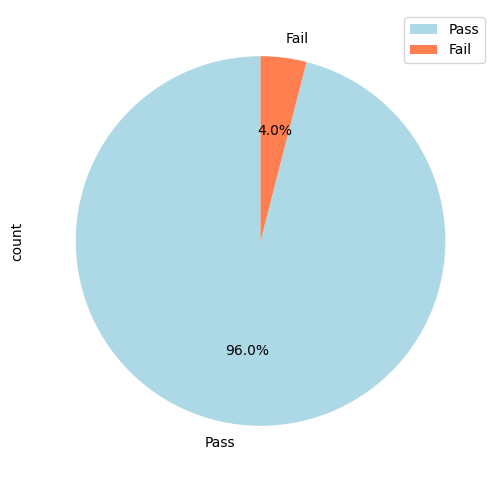

In [ ]:
df['math pass'] = df['math score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

math_pass_counts = df['math pass'].value_counts()

plt.figure(figsize=(6, 6))
math_pass_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'coral'])
plt.legend()
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

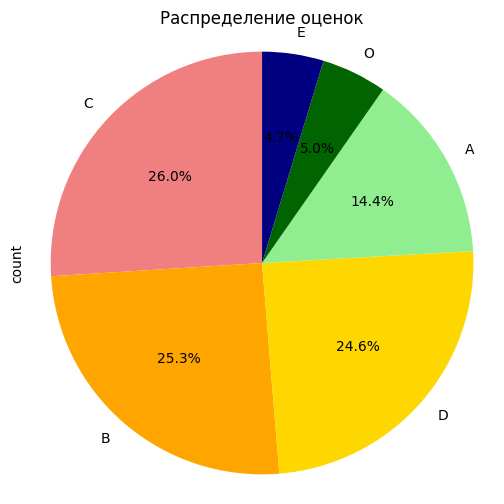

In [ ]:
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

bins = [0, 40, 60, 70, 80, 90, 100]
labels = ['E', 'D', 'C', 'B', 'A', 'O']
df['grade'] = pd.cut(df['average score'], bins=bins, labels=labels, include_lowest=True)
df.loc[df['math score'] < 40, 'grade'] = 'E'

grade_counts = df['grade'].value_counts()
plt.figure(figsize=(6, 6))
grade_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'orange', 'gold', 'lightgreen', 'darkgreen', 'navy'])
plt.axis('equal')
plt.title('Распределение оценок')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

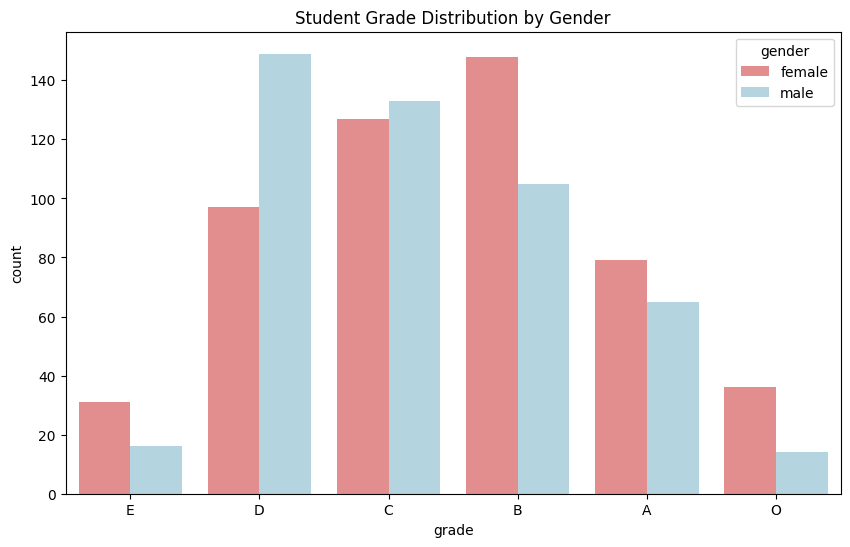

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='grade', hue='gender', data=df, palette=['lightcoral', 'lightblue'])
plt.title('Student Grade Distribution by Gender')
plt.show()


Ответ: Студентки получили больше оценок O, A, B